#Analyzing the Iris dataset with exploratory data analysis and machine learning.
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.
Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

1. Please make an exploratory data analysis using these data.
2. Please split the data based on: train/ test = 0.8/0.2. Then find out the ML algorithm with the best parameters and compute the accuracy of classification

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
sn.set_palette('husl')
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Load Dataset

In [2]:
# Reading data from the local storage

filename = r"H:\Djangopractise\ML_beggining\MIC_project\iris.xlsx"
data = pd.read_excel(filename)
data.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#to display about data
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Basic info about data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#display sample of each class
data['Class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

# Preprocessing the dataset

In [6]:
# Checking existence of null value in the dataset

data.isnull().sum()

# No null value is present in the dataset

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

# Exploratory data analysis

<AxesSubplot:xlabel='Class', ylabel='Petal Width'>

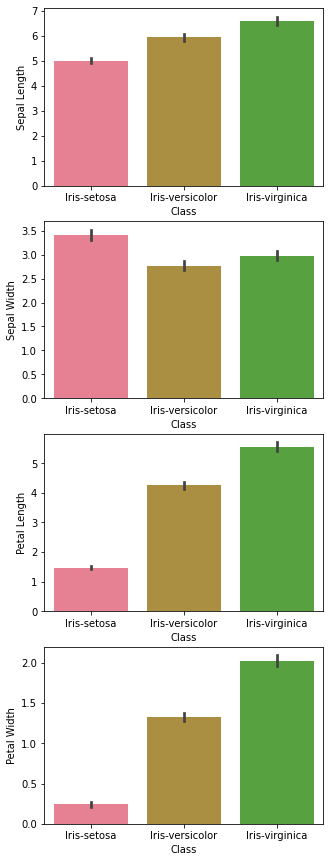

In [7]:

fig,[ax1,ax2,ax3,ax4] = plt.subplots(nrows=4, figsize=(5,15))
sn.barplot(x = data['Class'], y =data['Sepal Length'] ,ax = ax1)
sn.barplot(x = data['Class'], y = data['Sepal Width'],ax = ax2)
sn.barplot(x = data['Class'], y = data['Petal Length'],ax = ax3)
sn.barplot(x =data['Class'] , y = data['Petal Width'],ax = ax4)

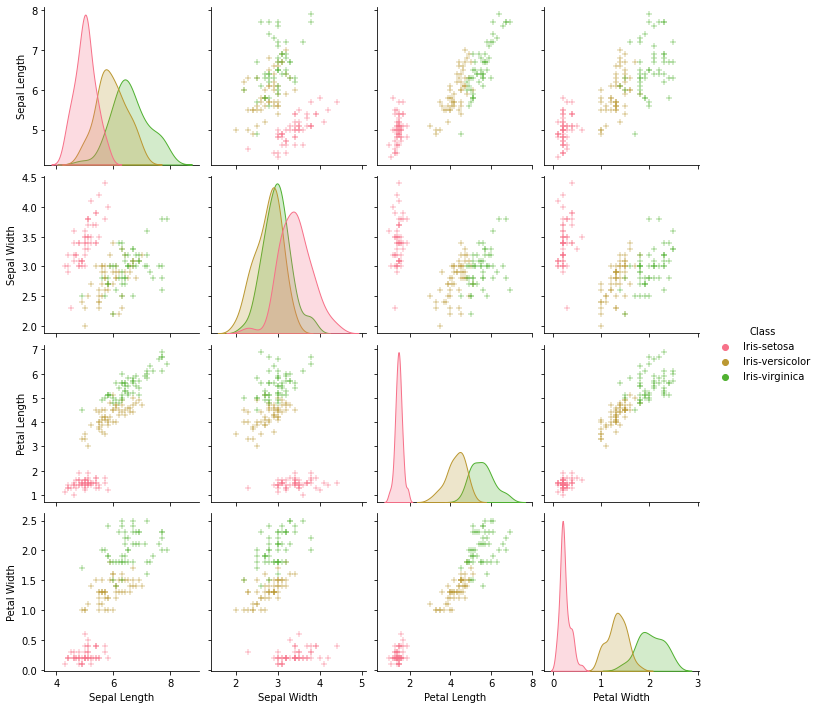

In [8]:
g = sn.pairplot(data,hue='Class', markers='+') #Plot pairwise relationships in a dataset.
plt.show()

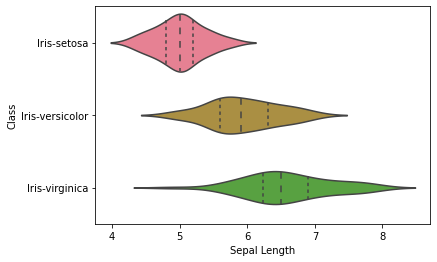

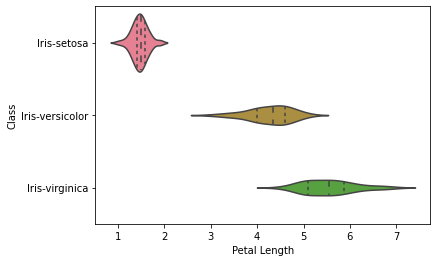

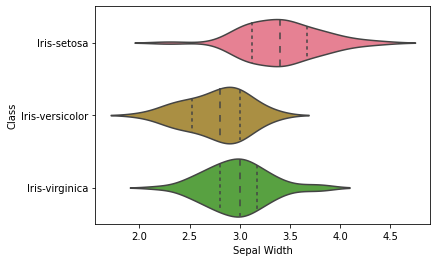

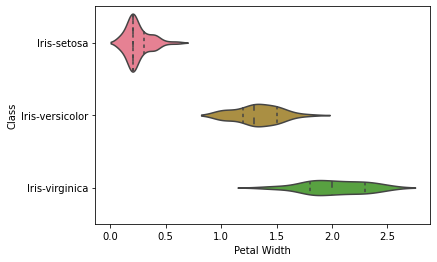

In [9]:
g = sn.violinplot(y='Class', x ='Sepal Length', data=data, inner='quartile') #sn.violinplot Draw a combination of boxplot and kernel density estimate.
plt.show()
g = sn.violinplot(y='Class', x ='Petal Length', data=data, inner='quartile')
plt.show()
g = sn.violinplot(y='Class', x ='Sepal Width', data=data, inner='quartile')
plt.show()
g = sn.violinplot(y='Class', x ='Petal Width', data=data, inner='quartile')
plt.show()

<AxesSubplot:>

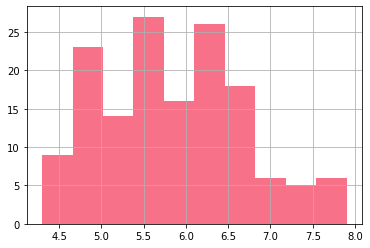

In [10]:
#histograms
data['Sepal Length'].hist()

<AxesSubplot:>

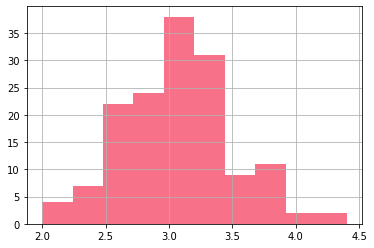

In [11]:
data['Sepal Width'].hist()

<AxesSubplot:>

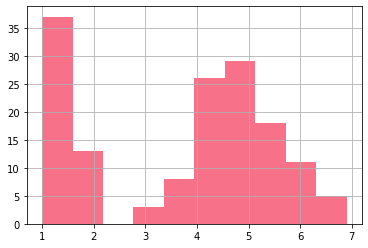

In [12]:

data['Petal Length'].hist()

<AxesSubplot:>

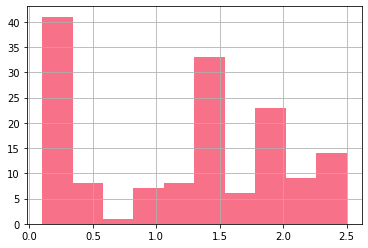

In [13]:
data['Petal Width'].hist()

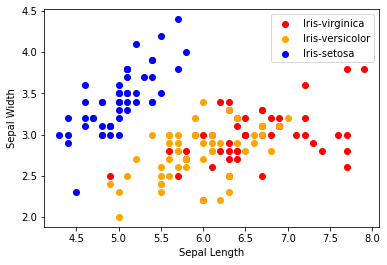

In [14]:
#Scatter plot
colores = ['red' , 'orange','blue']
Class=  ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(len(Class)):
    x = data[data['Class'] == Class[i]]
    plt.scatter(x['Sepal Length'],x['Sepal Width'] , c= colores[i] , label= Class[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
    

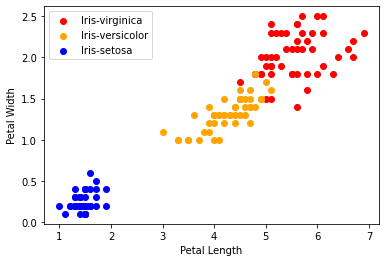

In [15]:
#Scatter plot
colores = ['red' , 'orange','blue']
Class=  ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(len(Class)):
    x = data[data['Class'] == Class[i]]
    plt.scatter(x['Petal Length'],x['Petal Width'] , c= colores[i] , label= Class[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
    

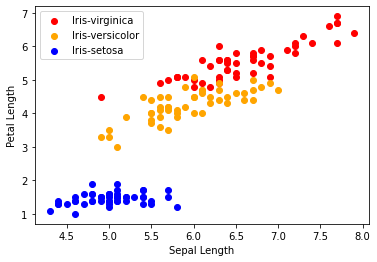

In [16]:
#Scatter plot
colores = ['red' , 'orange','blue']
Class=  ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(len(Class)):
    x = data[data['Class'] == Class[i]]
    plt.scatter(x['Sepal Length'],x['Petal Length'] , c= colores[i] , label= Class[i])

plt.xlabel('Sepal Length') 
plt.ylabel('Petal Length')
plt.legend()
    

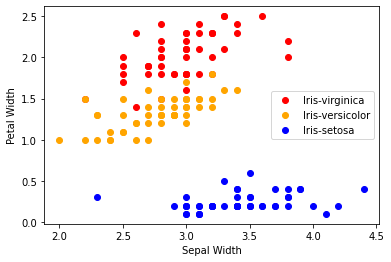

In [17]:
#Scatter plot
colores = ['red' , 'orange','blue']
Class=  ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(len(Class)):
    x = data[data['Class'] == Class[i]]
    plt.scatter(x['Sepal Width'],x['Petal Width'] , c= colores[i] , label= Class[i])

plt.xlabel('Sepal Width') 
plt.ylabel('Petal Width')
plt.legend()

# Correlation Matrix

In [18]:
# To see how variables are connected with each other, data correlation can be checked 
data.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

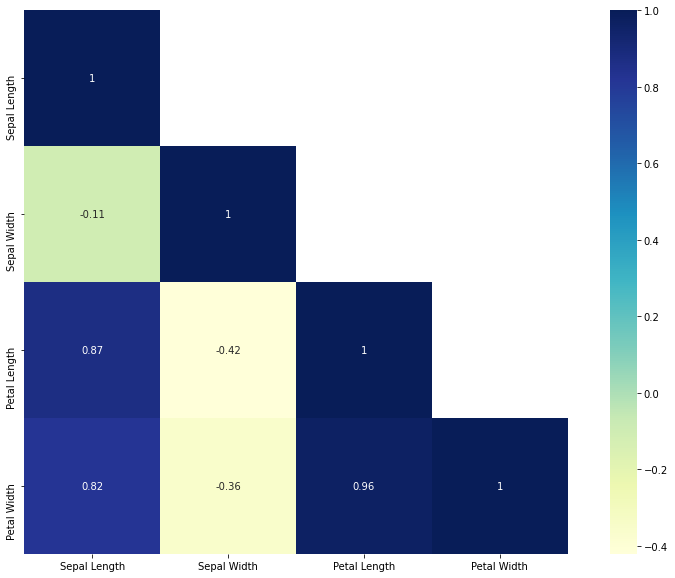

In [19]:
data_corr = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Class']].corr()
mask = np.array(data_corr)     #mask is indicating that no value of the associated array is invalid, or an array of booleans that determines for each element of the associated array whether the value is valid or not
mask[np.tril_indices_from(mask)] = False #Return the indices for the lower-triangle of arr.
fig = plt.subplots(figsize=(15,10))
sn.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True,cmap="YlGnBu")

# label Incoder 

In [20]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [21]:
#convert string in to numeric form 
data['Class'] = le.fit_transform(data['Class'])  
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [22]:
from sklearn.model_selection import train_test_split
#train -80
#test -20
X = data.drop(columns=['Class'])
Y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=5)

In [23]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


In [42]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [43]:
# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [45]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [46]:
# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  90.0


In [26]:
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor

In [27]:
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  89.66951871657754


In [28]:
model = BaggingRegressor()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  87.9144385026738


In [29]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  87.3843963608367


In [31]:
model =  RandomForestRegressor()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  90.59465240641713


In [32]:
model =  AdaBoostRegressor()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  88.9636891244909


In [48]:
#So # logistic regression gives us best accuracy

# Predictioin Test

In [41]:
pdf = model.predict([[4.5,2.3,1.3,0.3]])
pdf

array([0.])